# Classification Project

## File IO

Only File IO...

You may not change this code.

In [2]:
from tkinter.filedialog import askopenfilename
import pandas as pd
import tkinter
import os

tk_window = tkinter.Tk()
cwd = os.getcwd()

tr_data = pd.read_csv(askopenfilename(title='Choose your training data'))

tr_ans = pd.read_csv(askopenfilename(title='Choose your training answer'))

tr_ans = tr_ans.iloc[:, 0]

ts_data = pd.read_csv(askopenfilename(title='Choose your test data'))

tk_window.destroy()

## Predict Algorithm

Type your source code (Champion Algorithm)

In [3]:
# Base Module of data processing
import numpy as np
import time
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
# Bagging
from sklearn.ensemble import BaggingClassifier
start = time.clock()
BC = BaggingClassifier(n_estimators=50)
BC = BC.fit(tr_data, tr_ans)
y_pred = BC.predict(ts_data)
pred_df = pd.DataFrame(y_pred)
pred_df.to_csv("data₩₩Iris.csv", mode='w')
print(time.clock() - start)
# End of Demo

C:\Users\Susan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Check Accuracy

Only for check accuracy

In [4]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

tk_window = tkinter.Tk()
cwd = os.getcwd()
ts_ans = pd.read_csv(askopenfilename(title='Choose your test answer'))
ts_ans = ts_ans.iloc[:, 0]
tk_window.destroy()

print(accuracy(ts_ans, y_pred))

1.0


F-Score: 1.0
Accuracy:  1.0
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         8
          3       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        30



Text(0.5,4.5,'Ground Truth')

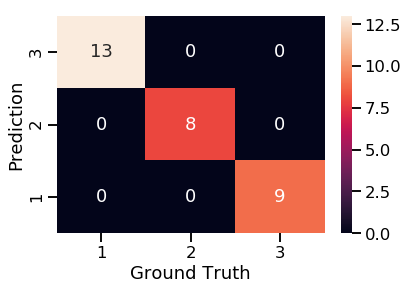

In [5]:
# Check Result
p,r,f,s = precision_recall_fscore_support(ts_ans, y_pred, average='micro')
print("F-Score:", round(f,3))
print("Accuracy: ", accuracy_score(ts_ans, y_pred))

print(classification_report(ts_ans, y_pred))

labels = sorted(ts_ans.unique())
chart = pd.DataFrame(confusion_matrix(ts_ans, y_pred),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(chart, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth')

In [6]:
print("Prediction in training data: {:.3f}".format(BC.score(tr_data, tr_ans)))
print("Prediction in test data: {:.3f}".format(BC.score(ts_data, ts_ans)))

Prediction in training data: 1.000
Prediction in test data: 1.000
